In [23]:
import gzip
import numpy as np
import keras as kr
import sklearn.preprocessing as pre


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

In [26]:
# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
with gzip.open('MNIST/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('MNIST/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [28]:
inputs = train_img.reshape(60000, 784)

In [29]:
encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [30]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


In [31]:
model.fit(inputs, outputs, epochs=2, batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 12s 206us/step - loss: 0.5485 - accuracy: 0.8375
Epoch 2/2
60000/60000 [==============================] - 12s 206us/step - loss: 0.2548 - accuracy: 0.9214


In [32]:
with gzip.open('MNIST/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('MNIST/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [33]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9372

In [34]:
model.predict(test_img[5:6])

array([[5.8915612e-07, 9.7264940e-01, 1.2282174e-03, 6.1650481e-04,
        2.8277349e-05, 9.3569415e-06, 4.3262054e-07, 2.2514431e-02,
        2.5009676e-03, 4.5172192e-04]], dtype=float32)

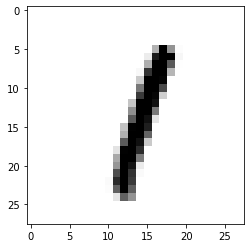

In [35]:
plt.imshow(test_img[5].reshape(28, 28), cmap='gray')

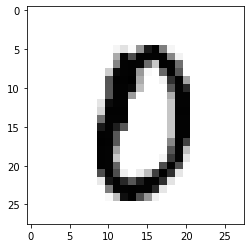

In [36]:
plt.imshow(test_img[55].reshape(28, 28), cmap='gray')